<a href="https://colab.research.google.com/github/viviannemedeiros/dataScience/blob/master/convenios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Projeto - Introdução à Ciência dos Dados - 16/12/2019** 

**Prof:** Luciano Barbosa

**Discente:** Vivianne Medeiros


**Objetivo:** analisar a base de dados dos Convênios celebrados pelo Governo Federal para identificar o padrão de distribuição e alocação dos recursos

**Fonte dos dados:** [Portal da Transparência - Convênios](http://portaltransparencia.gov.br/download-de-dados/convenios)   

[Dicionário de Dados](http://www.portaldatransparencia.gov.br/pagina-interna/603415-dicionario-de-dados-convenios)

**Ressalva:** Como o tamanho do arquivo original era superior a 250MB e o git tem uma restrição de upload de até 25MB por arquivo, selecionou-se as 39.999 primeiras linhas para utilização neste projeto, acreditando-se que ainda assim os objetivos educacionais seriam cumpridos.

## Leitura de arquivo e operações iniciais

In [1]:
import numpy as np
import pandas as pd
convenios=pd.read_csv("https://raw.githubusercontent.com/viviannemedeiros/dataScience/master/convenios.csv", 
                      encoding = "ISO-8859-1", sep=";", decimal=",")
pd.set_option('display.max_colwidth', -1)
convenios.head()

,NÚMERO CONVÊNIO,UF,CÓDIGO SIAFI MUNICÍPIO,NOME MUNICÍPIO,SITUAÇÃO CONVÊNIO,NÚMERO ORIGINAL,OBJETO DO CONVÊNIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO CONCEDENTE,NOME ÓRGÃO CONCEDENTE,CÓDIGO CONVENENTE,TIPO CONVENENTE,NOME CONVENENTE,TIPO ENTE CONVENENTE,TIPO INSTRUMENTO,VALOR CONVÊNIO,VALOR LIBERADO,DATA PUBLICAÇÃO,DATA INÍCIO VIGÊNCIA,DATA FINAL VIGÊNCIA,VALOR CONTRAPARTIDA,DATA ÚLTIMA LIBERAÇÃO,VALOR ÚLTIMA LIBERAÇÃO
0,104141,SP,6689,MAUA,CONCLUÍDO,2467/94/FAE,CONVENIO CELEBRADO ENTRE A FAE E A PM DE MAUA/SP PARA ATENDER PROGRAMA DE ALIMENTACAO ESCOLAR PROC 1118/94-83 _______________________________________ANA LUCIA,26000,Ministério da Educação,26298,Fundo Nacional de Desenvolvimento da Educação,46522959000198,Administração Pública Municipal,MUNICIPIO DE MAUA,Municipal,Sem informação,2110457.00,2054267.71,28/03/1996,28/02/1996,28/02/1999,0.0,07/12/1995,0.00
1,104773,RS,8963,VIAMAO,ADIMPLENTE,2520/94/FAE,"CONVENIO CELEBRADO ENTRE A FAE E P.M. DE VIAMAO/RS, PARA ATENDER AO PROGRAMA MERENDA ESCOLAR. PROC. 1752/94-99.",26000,Ministério da Educação,26298,Fundo Nacional de Desenvolvimento da Educação,88000914000101,Administração Pública Municipal,MUNICIPIO DE VIAMAO,Municipal,CONVENIO,515877.96,406200.76,19/03/1996,27/02/1996,28/02/1999,0.0,13/12/1995,0.00
2,112236,PE,2531,RECIFE,CONCLUÍDO,PG 096/94-00,EXECUCAO DE OBRAS E SERVICOS DE CONSTRUCAO RODOVIARIA NA BR-020/PI TRECHO PICOS - SAO RAIMUNDO NONATO.,39000,Ministério da Infraestrutura,39252,Departamento Nacional de Infraestrutura de Transportes,160202,Entidades Empresariais Privadas,3º BATALHÃO DE ENGENHARIA DE CONSTRUÇÃO,Municipal,Sem informação,19439537.00,17777924.41,24/12/1999,15/11/2002,28/06/2005,0.0,28/12/2004,0.00
3,116570,SP,6219,BAURU,CONCLUÍDO,1640/94,PROSSEGUIMENTO A OBRA DA NOVA UNIDADE DE INTERNACAO HOSPITALAR DO HPLLP/USP.,36000,Ministério da Saúde,36000,Ministério da Saúde - Unidades com vínculo direto,63025530008270,Administração Pública Estadual ou do Distrito Federal,UNIVERSIDADE DE SAO PAULO,Estadual,Sem informação,5000000.00,5000000.00,27/02/1998,29/12/1995,30/06/1998,0.0,29/12/1994,0.00
4,120304,RJ,6001,RIO DE JANEIRO,CONCLUÍDO,01/93 8/9. T.A.,SUPLEMENTACAO DE RECURSOS A FIM DE CUMPRIR OS OBJETIVO DO ACONVENIO ORIGINAL.,36000,Ministério da Saúde,36201,Fundação Oswaldo Cruz,30495394000167,Administração Pública Estadual ou do Distrito Federal,FUNDACAO CARLOS CHAGAS FILHO DE AMPARO A PESQUISA DO ESTADO DO RIO DE JANEIRO-FAPERJ,Estadual,Sem informação,12741999.13,11415402.92,21/12/2000,24/11/1995,28/02/2002,0.0,19/12/2001,153846.11


In [2]:
convenios.sort_values('VALOR CONVÊNIO', ascending=False).head(3)

,NÚMERO CONVÊNIO,UF,CÓDIGO SIAFI MUNICÍPIO,NOME MUNICÍPIO,SITUAÇÃO CONVÊNIO,NÚMERO ORIGINAL,OBJETO DO CONVÊNIO,CÓDIGO ÓRGÃO SUPERIOR,NOME ÓRGÃO SUPERIOR,CÓDIGO ÓRGÃO CONCEDENTE,NOME ÓRGÃO CONCEDENTE,CÓDIGO CONVENENTE,TIPO CONVENENTE,NOME CONVENENTE,TIPO ENTE CONVENENTE,TIPO INSTRUMENTO,VALOR CONVÊNIO,VALOR LIBERADO,DATA PUBLICAÇÃO,DATA INÍCIO VIGÊNCIA,DATA FINAL VIGÊNCIA,VALOR CONTRAPARTIDA,DATA ÚLTIMA LIBERAÇÃO,VALOR ÚLTIMA LIBERAÇÃO
3336,300186,DF,9701,BRASILIA,CONCLUÍDO,001/96,"TRANSFERENCIA DE RECURSOS FINANCEIROS PARA PAGAMENTO DO PESSOAL ATIVO,INATIVO E PENSIONISTAS, DAS AREAS DE SEGURANCA PUBLICA, EDUCACAO E SAUDE, BEM COMO O CUSTEIO DA SEGURANCA PUBLICA DO DISTRITO FEDERAL, EMCONFORMIDADE COM DISPOSITIVOS CONSTITUCIONAIS E OS DECRETOS 48.297 E48.298, AMBOS DE 17.06.60.",25000,Ministério da Economia,25000,Ministério da Economia - Unidades com vínculo direto,00394601000126,Administração Pública Estadual ou do Distrito Federal,DISTRITO FEDERAL,Estadual,Sem informação,3.620084e+09,3.620084e+09,10/01/1996,10/01/1996,31/12/1997,0.0,31/12/1997,2300000.00
4409,301431,DF,9701,BRASILIA,CONCLUÍDO,001/MPAS/SAS/96,"REPASSE DE VERBAS PARA O INSS VISANDO AO PAGAMENTO DO BENEFICIO DE PRESTACAO CONTINUADA, CONFORME O DISPOSTO NOS ARTS. 20, 21 E 35 DA LEIORGANICA DA ASSISTENCIA SOCIAL-LOAS E CONV. NUM 001/MPAS/SAS/96.",55000,Ministério da Cidadania,55001,Fundo Nacional de Assistência Social,510001,Agentes Intermediários,"COORD.GERAL DE ORÇAMENTO, FINANÇAS E CONTAB.",Municipal,Sem informação,1.052503e+09,8.634987e+08,13/03/1996,13/03/1996,31/12/1997,0.0,12/12/1997,54000000.03
1977,298495,RJ,6001,RIO DE JANEIRO,CONCLUÍDO,39300357200700262,"OBJETO: EXECUÇÃO DAS OBRAS DE IMPLANTAÇÃO E PAVIMENTAÇÃO DO ARCO METROPOLITANO DO RIO DE JANEIRO NA BR-493/RJ, COMPREENDIDO ENTRE O ENTROCAMENTO COM A BR-040/116(B)/RJ, ATÉ O ENTROCAMENTOCOM A BR-101/RJ, COMPREENDENDO AS OBRAS DE TERRAPLENAGEM, DRENAGEM, PAVIMENTAÇÃO OBRAS DE ARTE ESPECIAIS E TODAS AS DEMAIS PREVISTAS. LEI 11.578/2007, DECRETO N 6.450/2008 TRANSFERÊNCIA OBRIGATÓRIA. TERMO DE COMPROMISSO ASSINADO EM",39000,Ministério da Infraestrutura,39252,Departamento Nacional de Infraestrutura de Transportes,08599767000190,Administração Pública Estadual ou do Distrito Federal,SECRETARIA DE ESTADO DE INFRAESTRUTURA E OBRAS - SEINFRA,Estadual,Sem informação,7.000000e+08,0.000000e+00,19/12/2007,18/12/2007,18/10/2010,228681172.0,20/05/2009,34487090.00


In [3]:
# Verificando a quantidade de dados
convenios.shape
# len(convenios)

(39999, 24)

In [0]:
# Excluindo colunas que não serão objeto de análise
convenios = convenios.drop(['NÚMERO CONVÊNIO', 'CÓDIGO SIAFI MUNICÍPIO', 'NÚMERO ORIGINAL', 'OBJETO DO CONVÊNIO', 
                            'CÓDIGO ÓRGÃO SUPERIOR', 'CÓDIGO ÓRGÃO CONCEDENTE', 'CÓDIGO CONVENENTE','DATA PUBLICAÇÃO'], axis=1)

In [5]:
#Constantdo a quantidade de dados atuais
convenios.shape

(39999, 16)

In [6]:
convenios.describe()

,VALOR CONVÊNIO,VALOR LIBERADO,VALOR CONTRAPARTIDA,VALOR ÚLTIMA LIBERAÇÃO
count,3.999900e+04,3.999900e+04,3.999900e+04,3.999900e+04
mean,6.344792e+05,4.853171e+05,6.700967e+04,6.149511e+04
std,2.024115e+07,1.928241e+07,2.102704e+06,5.095207e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+04,6.692760e+03,0.000000e+00,4.000000e+02
50%,3.500000e+04,2.783770e+04,0.000000e+00,7.000000e+03
75%,1.125233e+05,9.722743e+04,6.349750e+03,3.750000e+04
max,3.620084e+09,3.620084e+09,2.682430e+08,5.400000e+07


## Setando campos como categóricos

In [7]:
convenios.dtypes

UF                        object 
NOME MUNICÍPIO            object 
SITUAÇÃO CONVÊNIO         object 
NOME ÓRGÃO SUPERIOR       object 
NOME ÓRGÃO CONCEDENTE     object 
TIPO CONVENENTE           object 
NOME CONVENENTE           object 
TIPO ENTE CONVENENTE      object 
TIPO INSTRUMENTO          object 
VALOR CONVÊNIO            float64
VALOR LIBERADO            float64
DATA INÍCIO VIGÊNCIA      object 
DATA FINAL VIGÊNCIA       object 
VALOR CONTRAPARTIDA       float64
DATA ÚLTIMA LIBERAÇÃO     object 
VALOR ÚLTIMA LIBERAÇÃO    float64
dtype: object

In [0]:
#Ajustando tipos dos dados
convenios['UF'] = convenios['UF'].astype('category')
convenios['NOME MUNICÍPIO'] = convenios['NOME MUNICÍPIO'].astype('category')
convenios['SITUAÇÃO CONVÊNIO'] = convenios['SITUAÇÃO CONVÊNIO'].astype('category')
convenios['NOME ÓRGÃO SUPERIOR'] = convenios['NOME ÓRGÃO SUPERIOR'].astype('category')
convenios['NOME ÓRGÃO CONCEDENTE'] = convenios['NOME ÓRGÃO CONCEDENTE'].astype('category')
convenios['TIPO CONVENENTE'] = convenios['TIPO CONVENENTE'].astype('category')
convenios['NOME CONVENENTE'] = convenios['NOME CONVENENTE'].astype('category')
convenios['TIPO ENTE CONVENENTE'] = convenios['TIPO ENTE CONVENENTE'].astype('category')
convenios['TIPO INSTRUMENTO'] = convenios['TIPO INSTRUMENTO'].astype('category')


In [9]:
convenios.dtypes

UF                        category
NOME MUNICÍPIO            category
SITUAÇÃO CONVÊNIO         category
NOME ÓRGÃO SUPERIOR       category
NOME ÓRGÃO CONCEDENTE     category
TIPO CONVENENTE           category
NOME CONVENENTE           category
TIPO ENTE CONVENENTE      category
TIPO INSTRUMENTO          category
VALOR CONVÊNIO            float64 
VALOR LIBERADO            float64 
DATA INÍCIO VIGÊNCIA      object  
DATA FINAL VIGÊNCIA       object  
VALOR CONTRAPARTIDA       float64 
DATA ÚLTIMA LIBERAÇÃO     object  
VALOR ÚLTIMA LIBERAÇÃO    float64 
dtype: object

## Conhecendo um pouco mais os dados

In [10]:
convenios['UF'].cat.categories

Index(['-1', 'AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'EX', 'GO', 'MA',
       'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR',
       'RS', 'SC', 'SE', 'SP', 'TO'],
      dtype='object')

In [11]:
convenios['SITUAÇÃO CONVÊNIO'].cat.categories

Index(['ADIMPLENTE', 'ARQUIVADO', 'BAIXADO', 'CANCELADO', 'CONCLUÍDO',
       'EXCLUÍDO', 'INADIMPLENTE', 'INADIMPLÊNCIA SUSPENSA', 'RESCINDIDO'],
      dtype='object')

In [12]:
convenios['TIPO CONVENENTE'].cat.categories

Index(['Administração Pública',
       'Administração Pública Estadual ou do Distrito Federal',
       'Administração Pública Federal', 'Administração Pública Municipal',
       'Agentes Intermediários', 'Entidades Empresariais Privadas',
       'Entidades Sem Fins Lucrativos', 'Fundo Público',
       'Organizações Internacionais', 'Pessoa Física', 'Sem Informação'],
      dtype='object')

In [13]:
convenios['TIPO ENTE CONVENENTE'].cat.categories

Index(['Estadual', 'Municipal'], dtype='object')

In [16]:
convenios['TIPO INSTRUMENTO'].cat.categories

Index(['ACORDO DE COOPERACAO TECNICA', 'CONTRATO DE REPASSE', 'CONVENIO',
       'Sem informação', 'TERMO DE COMPROMISSO', 'TERMO DE PARCERIA',
       'TRANSFERENCIA LEGAL'],
      dtype='object')

In [15]:
convenios['NOME ÓRGÃO SUPERIOR'].cat.categories 

Index(['Controladoria-Geral da União',
       'Ministério da Agricultura, Pecuária e Abastecimento',
       'Ministério da Cidadania',
       'Ministério da Ciência, Tecnologia, Inovações e Comunicações',
       'Ministério da Defesa', 'Ministério da Economia',
       'Ministério da Educação', 'Ministério da Infraestrutura',
       'Ministério da Justiça e Segurança Pública',
       'Ministério da Mulher, Família e Direitos Humanos',
       'Ministério da Pesca e Aquicultura', 'Ministério da Previdência Social',
       'Ministério da Saúde', 'Ministério das Comunicações',
       'Ministério das Relações Exteriores', 'Ministério de Minas e Energia',
       'Ministério do Desenvolvimento Regional', 'Ministério do Meio Ambiente',
       'Ministério do Planejamento, Desenvolvimento e Gestão',
       'Ministério do Trabalho e Emprego', 'Ministério do Turismo',
       'Presidência da República'],
      dtype='object')

In [17]:
convenios['NOME ÓRGÃO CONCEDENTE'].cat.categories 

Index(['Agência Espacial Brasileira', 'Agência Nacional de Aviação Civil',
       'Agência Nacional de Energia Elétrica',
       'Agência Nacional de Saúde Suplementar', 'Agência Nacional do Cinema',
       'Agência de Desenvolvimento da Amazônia',
       'Banco Central do Brasil - Orçamento Fiscal e Seguridade Social',
       'Comando da Aeronáutica', 'Comando da Marinha',
       'Comando da Marinha - Fundo Naval', 'Comando do Exército',
       'Comissão Nacional de Energia Nuclear',
       'Companhia Brasileira de Trens Urbanos',
       'Companhia Nacional de Abastecimento',
       'Companhia de Desenvolvimento dos Vales do São Francisco e do Parnaíba',
       'Conselho Nacional de Desenvolvimento Científico e Tecnológico',
       'Controladoria-Geral da União',
       'Departamento Nacional de Estradas de Rodagem',
       'Departamento Nacional de Infraestrutura de Transportes',
       'Departamento Nacional de Obras Contra as Secas',
       'Departamento Nacional de Produção Minera

## Tratamento de dados ausentes

In [18]:
convenios.head()

,UF,NOME MUNICÍPIO,SITUAÇÃO CONVÊNIO,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO CONCEDENTE,TIPO CONVENENTE,NOME CONVENENTE,TIPO ENTE CONVENENTE,TIPO INSTRUMENTO,VALOR CONVÊNIO,VALOR LIBERADO,DATA INÍCIO VIGÊNCIA,DATA FINAL VIGÊNCIA,VALOR CONTRAPARTIDA,DATA ÚLTIMA LIBERAÇÃO,VALOR ÚLTIMA LIBERAÇÃO
0,SP,MAUA,CONCLUÍDO,Ministério da Educação,Fundo Nacional de Desenvolvimento da Educação,Administração Pública Municipal,MUNICIPIO DE MAUA,Municipal,Sem informação,2110457.00,2054267.71,28/02/1996,28/02/1999,0.0,07/12/1995,0.00
1,RS,VIAMAO,ADIMPLENTE,Ministério da Educação,Fundo Nacional de Desenvolvimento da Educação,Administração Pública Municipal,MUNICIPIO DE VIAMAO,Municipal,CONVENIO,515877.96,406200.76,27/02/1996,28/02/1999,0.0,13/12/1995,0.00
2,PE,RECIFE,CONCLUÍDO,Ministério da Infraestrutura,Departamento Nacional de Infraestrutura de Transportes,Entidades Empresariais Privadas,3º BATALHÃO DE ENGENHARIA DE CONSTRUÇÃO,Municipal,Sem informação,19439537.00,17777924.41,15/11/2002,28/06/2005,0.0,28/12/2004,0.00
3,SP,BAURU,CONCLUÍDO,Ministério da Saúde,Ministério da Saúde - Unidades com vínculo direto,Administração Pública Estadual ou do Distrito Federal,UNIVERSIDADE DE SAO PAULO,Estadual,Sem informação,5000000.00,5000000.00,29/12/1995,30/06/1998,0.0,29/12/1994,0.00
4,RJ,RIO DE JANEIRO,CONCLUÍDO,Ministério da Saúde,Fundação Oswaldo Cruz,Administração Pública Estadual ou do Distrito Federal,FUNDACAO CARLOS CHAGAS FILHO DE AMPARO A PESQUISA DO ESTADO DO RIO DE JANEIRO-FAPERJ,Estadual,Sem informação,12741999.13,11415402.92,24/11/1995,28/02/2002,0.0,19/12/2001,153846.11


In [19]:
# Verificando quantidade de dados nulos
print(convenios.isnull().sum())

UF                        0   
NOME MUNICÍPIO            0   
SITUAÇÃO CONVÊNIO         0   
NOME ÓRGÃO SUPERIOR       0   
NOME ÓRGÃO CONCEDENTE     0   
TIPO CONVENENTE           0   
NOME CONVENENTE           0   
TIPO ENTE CONVENENTE      0   
TIPO INSTRUMENTO          0   
VALOR CONVÊNIO            0   
VALOR LIBERADO            0   
DATA INÍCIO VIGÊNCIA      0   
DATA FINAL VIGÊNCIA       0   
VALOR CONTRAPARTIDA       0   
DATA ÚLTIMA LIBERAÇÃO     4439
VALOR ÚLTIMA LIBERAÇÃO    0   
dtype: int64


In [0]:
# Como a utilidade da coluna DATA ÚLTIMA LIBERAÇÃO era duvidosa e apresentou muitos dados vazios, optou-se por excluí-la
convenios = convenios.drop(['DATA ÚLTIMA LIBERAÇÃO'], axis=1)
# Além disso, VALOR ÚLTIMA LIBERAÇÃO apresentou falsos não nulos, contendo zero inadequadamente, de forma que também foi excluído dessa análise inicial
convenios = convenios.drop(['VALOR ÚLTIMA LIBERAÇÃO'], axis=1)

In [21]:
# Confirmando exclusões
print(convenios.isnull().sum())

UF                       0
NOME MUNICÍPIO           0
SITUAÇÃO CONVÊNIO        0
NOME ÓRGÃO SUPERIOR      0
NOME ÓRGÃO CONCEDENTE    0
TIPO CONVENENTE          0
NOME CONVENENTE          0
TIPO ENTE CONVENENTE     0
TIPO INSTRUMENTO         0
VALOR CONVÊNIO           0
VALOR LIBERADO           0
DATA INÍCIO VIGÊNCIA     0
DATA FINAL VIGÊNCIA      0
VALOR CONTRAPARTIDA      0
dtype: int64


In [22]:
#Por fim, verificou-se os falsos não nulos
print((convenios['TIPO CONVENENTE'] == 'Sem Informação').sum())
print((convenios['TIPO INSTRUMENTO'] == 'Sem informação').sum())
print((convenios['UF'] == '-1').sum() + (convenios['UF'] == 'EX').sum())
print((convenios['VALOR CONVÊNIO'] == 0).sum())

29
34318
36
338


In [0]:
# Como TIPO INSTRUMENTO apresentou grande quantidade de registros Sem informação, optou-se por excluí-lo
convenios = convenios.drop(['TIPO INSTRUMENTO'], axis=1)
# Também decidiu-se remover as instâncias inválidas cujo VALOR CONVÊNIO = 0
convenios = convenios[(convenios['VALOR CONVÊNIO'] > 0)]
# Por fim, removeu-se as instâncias com UF inválidas 
convenios = convenios.loc[(convenios['UF'] != "-1")]
convenios = convenios.loc[(convenios['UF'] != "EX")]

In [24]:
convenios['UF'].value_counts()

MG    4330
SP    4195
RJ    3116
RS    2948
PR    2720
BA    1956
SC    1910
PE    1744
DF    1658
CE    1509
MA    1296
GO    1285
PI    1284
PB    1274
PA    1183
RN    1155
MT    1040
AL    777 
ES    664 
TO    646 
MS    610 
AM    589 
SE    532 
RO    499 
AC    287 
RR    221 
AP    198 
EX    0   
-1    0   
Name: UF, dtype: int64

In [25]:
convenios.shape

(39626, 13)

## Normalização e Discretização

In [26]:
# Normalizando, apenas para fins educativos
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
convenios['valor_norm'] = scaler.fit_transform(convenios[['VALOR CONVÊNIO']])
# Por média e desvio padrão
convenios['valor_norm'] = (convenios['VALOR CONVÊNIO'] - convenios['VALOR CONVÊNIO'].mean()) / (convenios['VALOR CONVÊNIO'].std())
convenios['valor_norm'].describe()

count    3.962600e+04
mean    -1.100356e-16
std      1.000000e+00
min     -3.147869e-02
25%     -3.098695e-02
50%     -2.972633e-02
75%     -2.585602e-02
max      1.779818e+02
Name: valor_norm, dtype: float64

In [27]:
# Por min e max
# Intervalo [0, 1] 
convenios['valor_norm'] = (convenios['VALOR CONVÊNIO'] - convenios['VALOR CONVÊNIO'].min()) / (convenios['VALOR CONVÊNIO'].max() - convenios['VALOR CONVÊNIO'].min()) 
# Intervalo [-1, 1]
# convenios['valor_norm'] = ((convenios['VALOR CONVÊNIO'] - convenios['VALOR CONVÊNIO'].min()) / (convenios['VALOR CONVÊNIO'].max() - convenios['VALOR CONVÊNIO'].min())*2) -1 
convenios['valor_norm'].describe()


count    39626.000000
mean     0.000177    
std      0.005618    
min      0.000000    
25%      0.000003    
50%      0.000010    
75%      0.000032    
max      1.000000    
Name: valor_norm, dtype: float64

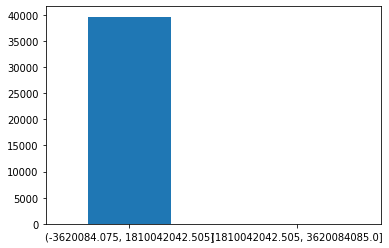

In [28]:
# Discretizando com 2 intervalos iguais
convenios['valor_dist'] = pd.cut(convenios['VALOR CONVÊNIO'],2)

counts = convenios['valor_dist'].value_counts()
counts.plot.bar(rot=0)

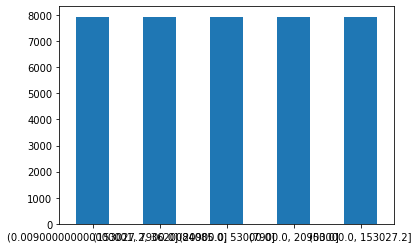

In [29]:
# Discretizando com números de elementos iguais
convenios['valor_dist'] = pd.qcut(convenios['VALOR CONVÊNIO'],5)
convenios['valor_dist'].value_counts()
counts = convenios['valor_dist'].value_counts()
counts.plot.bar(rot=0)

## Removendo Outliers


In [30]:
convenios['VALOR CONVÊNIO'].describe()

count    3.962600e+04
mean     6.401516e+05
std      2.033603e+07
min      1.000000e-02
25%      1.000000e+04
50%      3.563600e+04
75%      1.143427e+05
max      3.620084e+09
Name: VALOR CONVÊNIO, dtype: float64

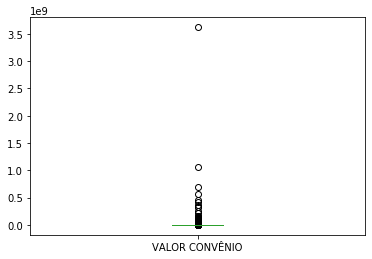

In [31]:
convenios['VALOR CONVÊNIO'].plot.box()

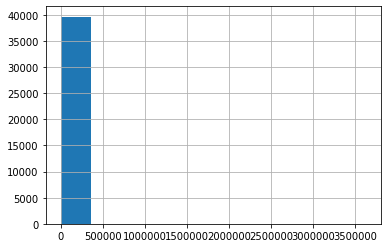

In [32]:
(convenios['VALOR CONVÊNIO']/1000).hist()

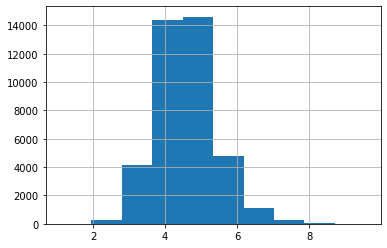

In [33]:
convenios['log_valor'] = convenios['VALOR CONVÊNIO'].apply(np.log10)
convenios[convenios['log_valor'] > 0]['log_valor'].hist()

In [34]:
# Utilizando z-score robusto (univariado)
from numpy import abs
mad = abs(convenios['log_valor'] - convenios['log_valor'].median()).median()*(1/0.6745)
print(mad)

0.7868044587387971


In [35]:
conveniosLimpos = convenios[abs(convenios['log_valor']-convenios['log_valor'].median())/mad < 3.5]
print(len(conveniosLimpos))

39472


In [36]:
# Utilizando Tukey (univariado)
q1 = convenios['log_valor'].quantile(q=0.25)
q3 = convenios['log_valor'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)


1.0582083859966733


In [37]:
conveniosLimposTukey = convenios[(convenios['log_valor'] > (q1-1.5*iqr)) & (convenios['log_valor'] < (q3+1.5*iqr))]
len(conveniosLimposTukey)

39011

## Visualização dos dados



In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
#Imprimindo um mapa de calor usando a correlação de Spearman
convenios.corr(method='spearman').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,VALOR CONVÊNIO,VALOR LIBERADO,VALOR CONTRAPARTIDA,valor_norm,log_valor
VALOR CONVÊNIO,1.0,0.83,0.51,1.0,1.0
VALOR LIBERADO,0.83,1.0,0.43,0.83,0.83
VALOR CONTRAPARTIDA,0.51,0.43,1.0,0.51,0.51
valor_norm,1.0,0.83,0.51,1.0,1.0
log_valor,1.0,0.83,0.51,1.0,1.0


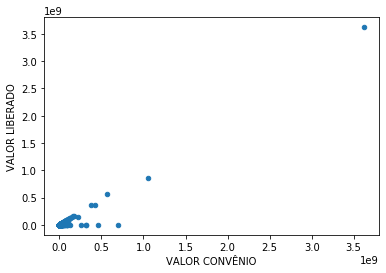

In [39]:
convenios.plot.scatter(x='VALOR CONVÊNIO', y='VALOR LIBERADO')

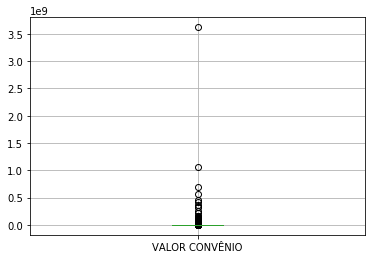

In [40]:
convenios.boxplot(column=['VALOR CONVÊNIO'])

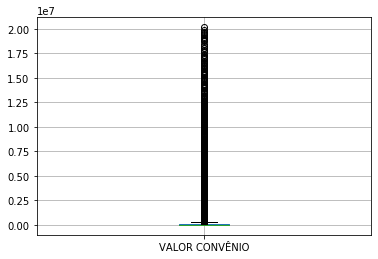

In [41]:
# Gráfico removendo os outliers com método de Z-Score Robusto
conveniosLimpos.boxplot(column=['VALOR CONVÊNIO'])

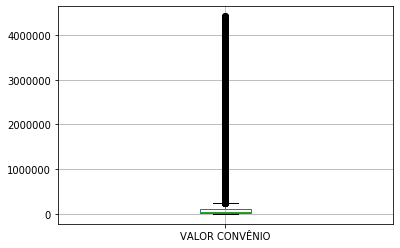

In [42]:
# Gráfico removendo os outliers com método de Tukey
conveniosLimposTukey.boxplot(column=['VALOR CONVÊNIO'])

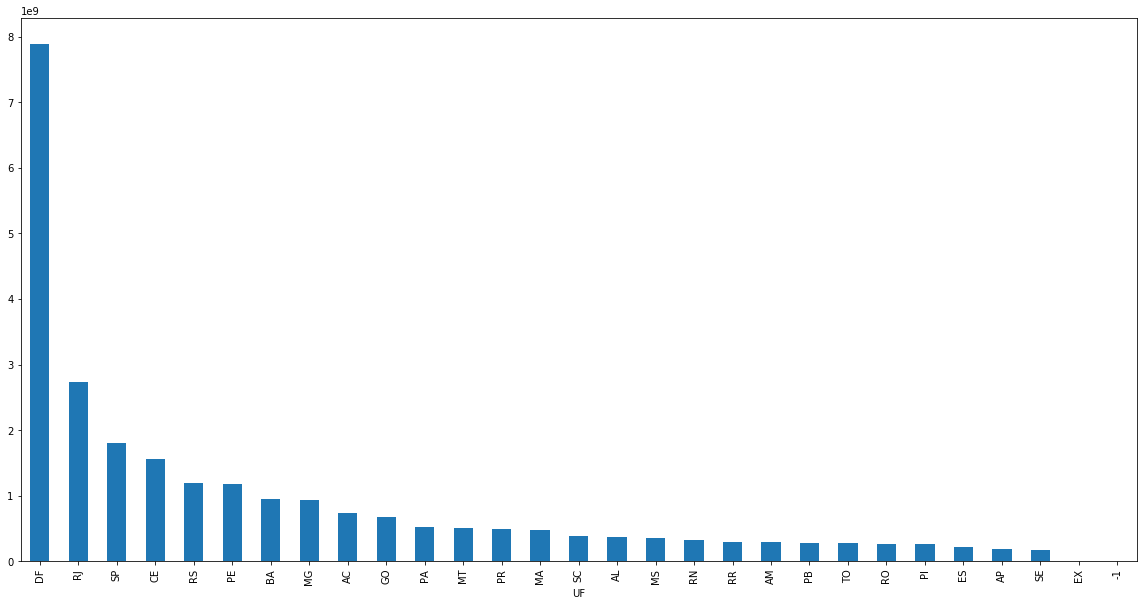

In [43]:
# Verificado o valor alocado aos convênios por cada UF
convenios.groupby(['UF'])['VALOR CONVÊNIO'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

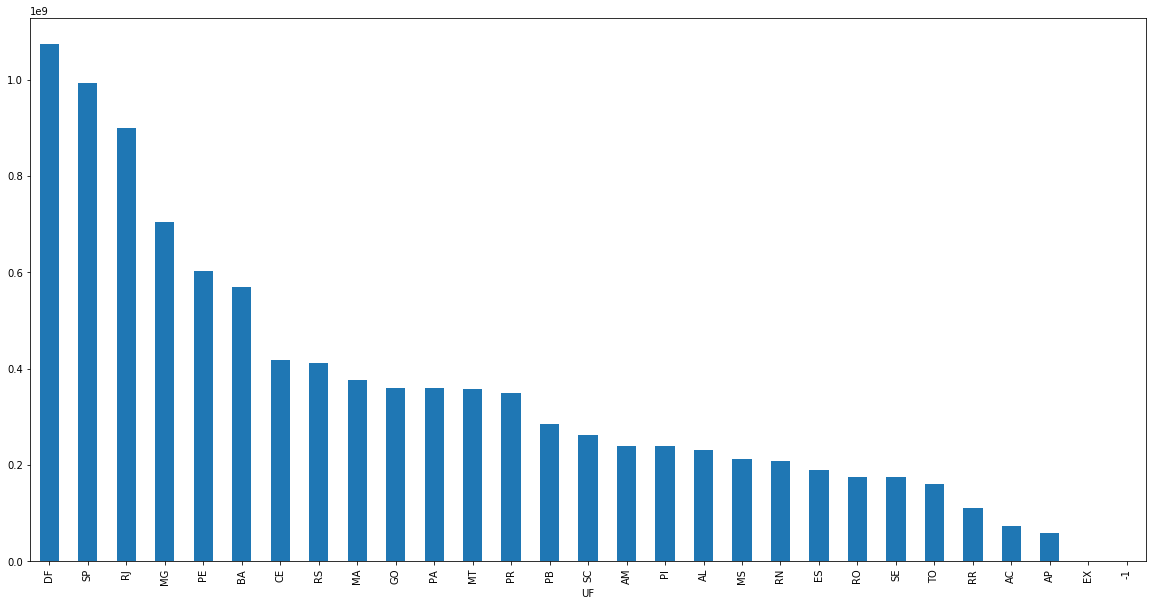

In [44]:
# Verificado o valor alocado aos convênios por cada UF, gráfico removendo os outliers com método de Z-Score Robusto
conveniosLimpos.groupby(['UF'])['VALOR CONVÊNIO'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

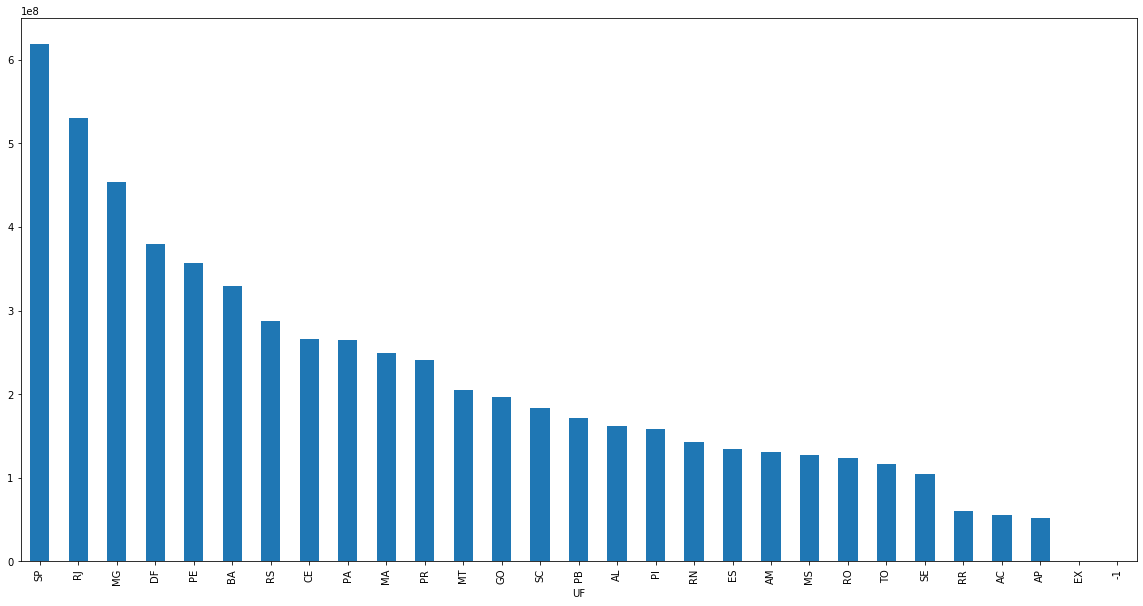

In [45]:
# Verificado o valor alocado aos convênios por cada UF, gráfico removendo os outliers com método de Tukey
conveniosLimposTukey.groupby(['UF'])['VALOR CONVÊNIO'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

**Análise dos gráficos:** para o recorte de dados analisados, verificou-se que há uma concentração de recursos de convênios em determinados estados brasileiros. Tal constatação pode ser observada ao analisar os dados sem eliminar outliers e também manteve-se quando eles foram retirados.

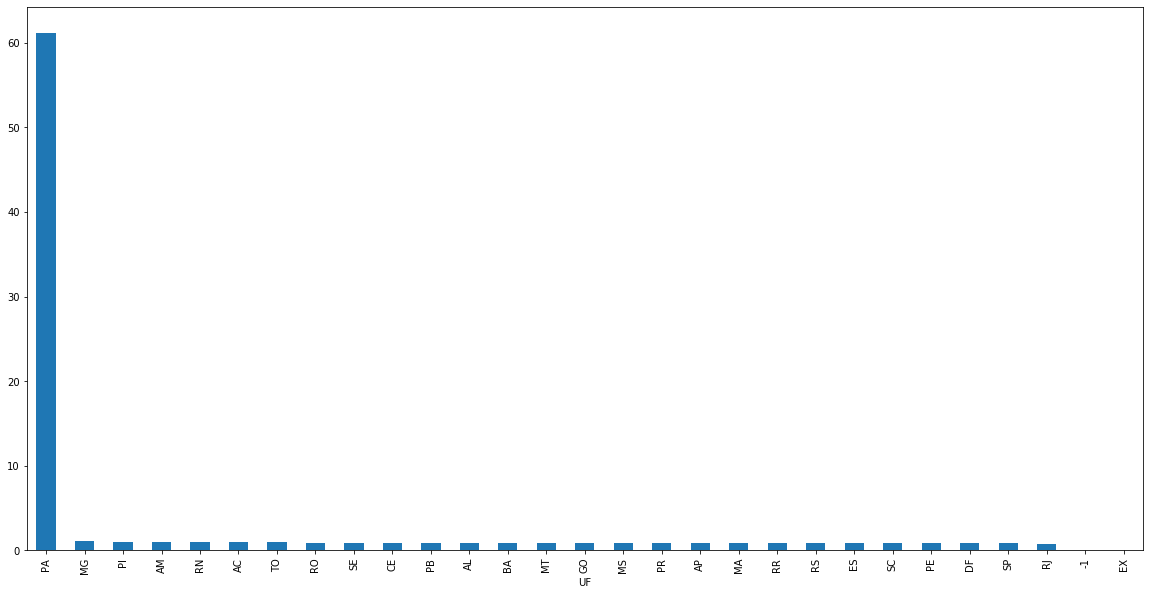

In [46]:
# Comparando o percentual de valores dos convênios já liberados para verificar se é proporcional entre os estados brasileiros
convenios['PERCENTUAL LIBERADO'] = (convenios['VALOR LIBERADO']/convenios['VALOR CONVÊNIO'])
convenios.groupby(['UF'])['PERCENTUAL LIBERADO'].mean().sort_values(ascending=False).plot.bar(figsize=(20,10))

In [47]:
# Percebeu-se que há registros cujo VALOR LIBERADO é imensamente maior que o VALOR CONVÊNIO, apontando para distorções nos dados
convenios.sort_values('PERCENTUAL LIBERADO', ascending=False).head(5)

,UF,NOME MUNICÍPIO,SITUAÇÃO CONVÊNIO,NOME ÓRGÃO SUPERIOR,NOME ÓRGÃO CONCEDENTE,TIPO CONVENENTE,NOME CONVENENTE,TIPO ENTE CONVENENTE,VALOR CONVÊNIO,VALOR LIBERADO,DATA INÍCIO VIGÊNCIA,DATA FINAL VIGÊNCIA,VALOR CONTRAPARTIDA,valor_norm,valor_dist,log_valor,PERCENTUAL LIBERADO
21935,PA,BRAGANCA,CONCLUÍDO,Ministério da Saúde,Fundação Nacional de Saúde,Administração Pública Municipal,MUNICIPIO DE BRAGANCA,Municipal,1.0,71261.88,14/07/1997,14/08/1998,12960.0,2.734743e-10,"(0.009000000000000001, 7900.0]",0.000000,71261.880000
12954,MG,JUIZ DE FORA,CONCLUÍDO,Ministério da Educação,Fundo Nacional de Desenvolvimento da Educação,Agentes Intermediários,UNIVERSIDADE FEDERAL DE JUIZ DE FORA,Municipal,76.0,68506.00,12/08/1996,07/03/1997,0.0,2.099123e-08,"(0.009000000000000001, 7900.0]",1.880814,901.394737
7448,AM,CAAPIRANGA,CONCLUÍDO,Ministério da Educação,Fundo Nacional de Desenvolvimento da Educação,Administração Pública Municipal,MUNICIPIO DE CAAPIRANGA,Municipal,2716.0,54757.00,26/06/1996,28/02/1999,7455.0,7.502561e-07,"(0.009000000000000001, 7900.0]",3.433930,20.160898
31397,SP,JULIO MESQUITA,CONCLUÍDO,Ministério da Educação,Fundo Nacional de Desenvolvimento da Educação,Administração Pública Municipal,MUNICIPIO DE JULIO MESQUITA,Municipal,3216.0,29212.00,01/10/1997,28/02/1999,0.0,8.883744e-07,"(0.009000000000000001, 7900.0]",3.507316,9.083333
31198,MA,LAJEADO NOVO,CONCLUÍDO,Ministério da Educação,Fundo Nacional de Desenvolvimento da Educação,Administração Pública Municipal,MUNICIPIO DE LAJEADO NOVO,Municipal,6389.0,51824.00,01/10/1997,28/02/1999,0.0,1.764873e-06,"(0.009000000000000001, 7900.0]",3.805433,8.111442


In [48]:
# Assim, eliminou-se valores cujo VALOR LIBERADO é maior que VALOR CONVÊNIO, para melhor analisar o gráfico sem estas distorções
conveniosCorrigidos = convenios[convenios['PERCENTUAL LIBERADO'] <= 1]
len(conveniosCorrigidos)


39502

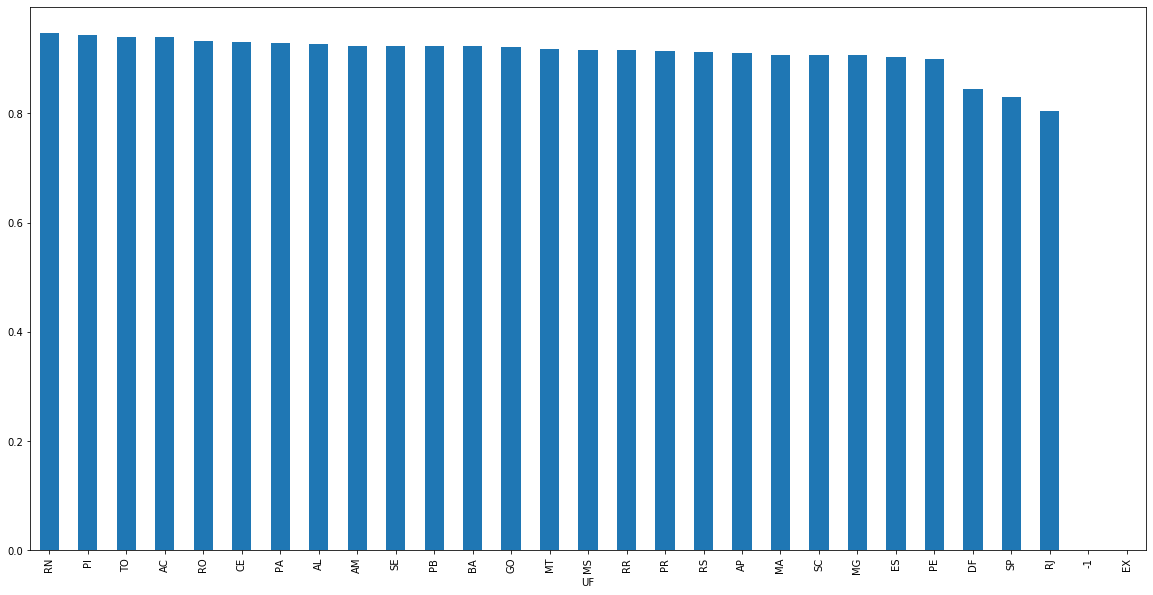

In [49]:
# Gráfico com média do percentual de recursos liberados entre os estados
conveniosCorrigidos.groupby(['UF'])['PERCENTUAL LIBERADO'].mean().sort_values(ascending=False).plot.bar(figsize=(20,10))

**Análise do gráfico:** após eliminação de registros que sinalizavam para distorções, observou-se que a média da liberação de recursos é bem proporcional entre os estados brasileiros, 
considerando o recorte de dados analisados.

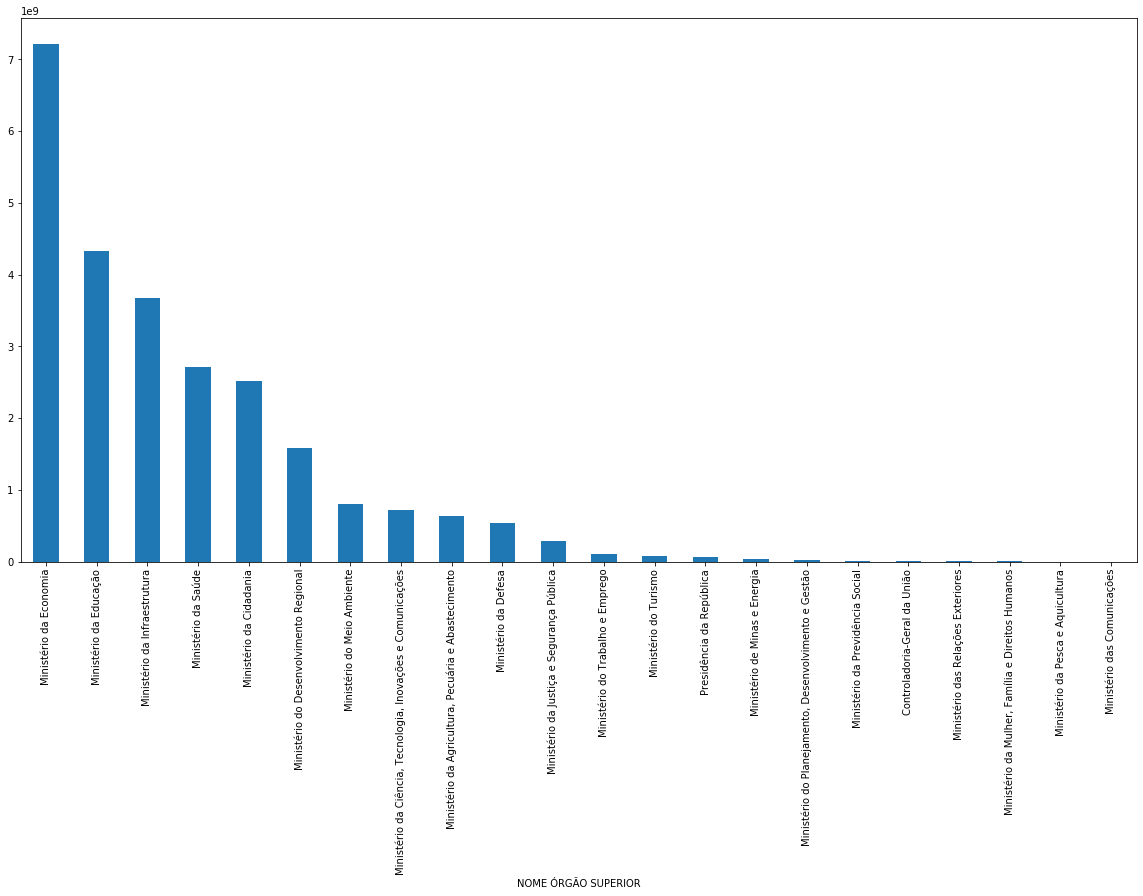

In [50]:
# Analisando a quantidade de recursos distribuídos por cada Órgão Concedente
convenios.groupby(['NOME ÓRGÃO SUPERIOR'])['VALOR CONVÊNIO'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

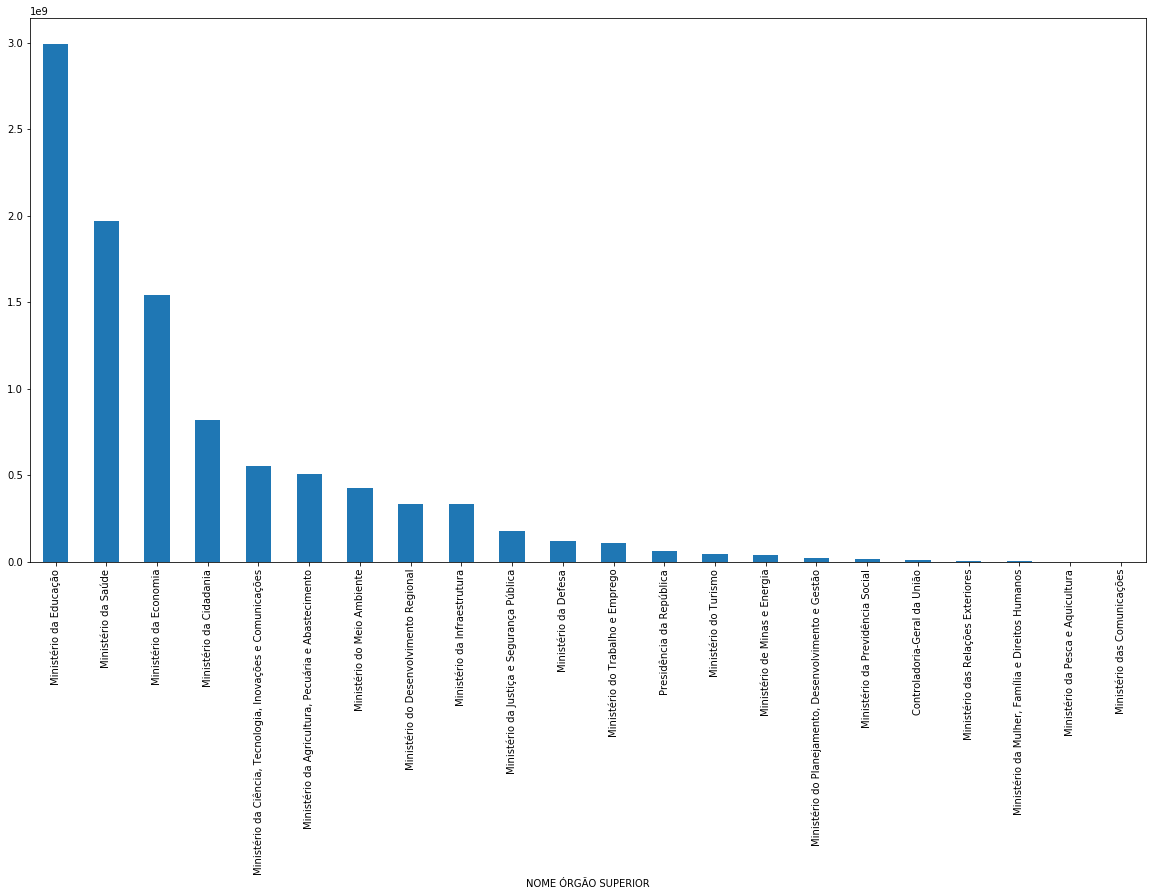

In [51]:
# Gráfico removendo os outliers com método de Z-Score Robusto
conveniosLimpos.groupby(['NOME ÓRGÃO SUPERIOR'])['VALOR CONVÊNIO'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

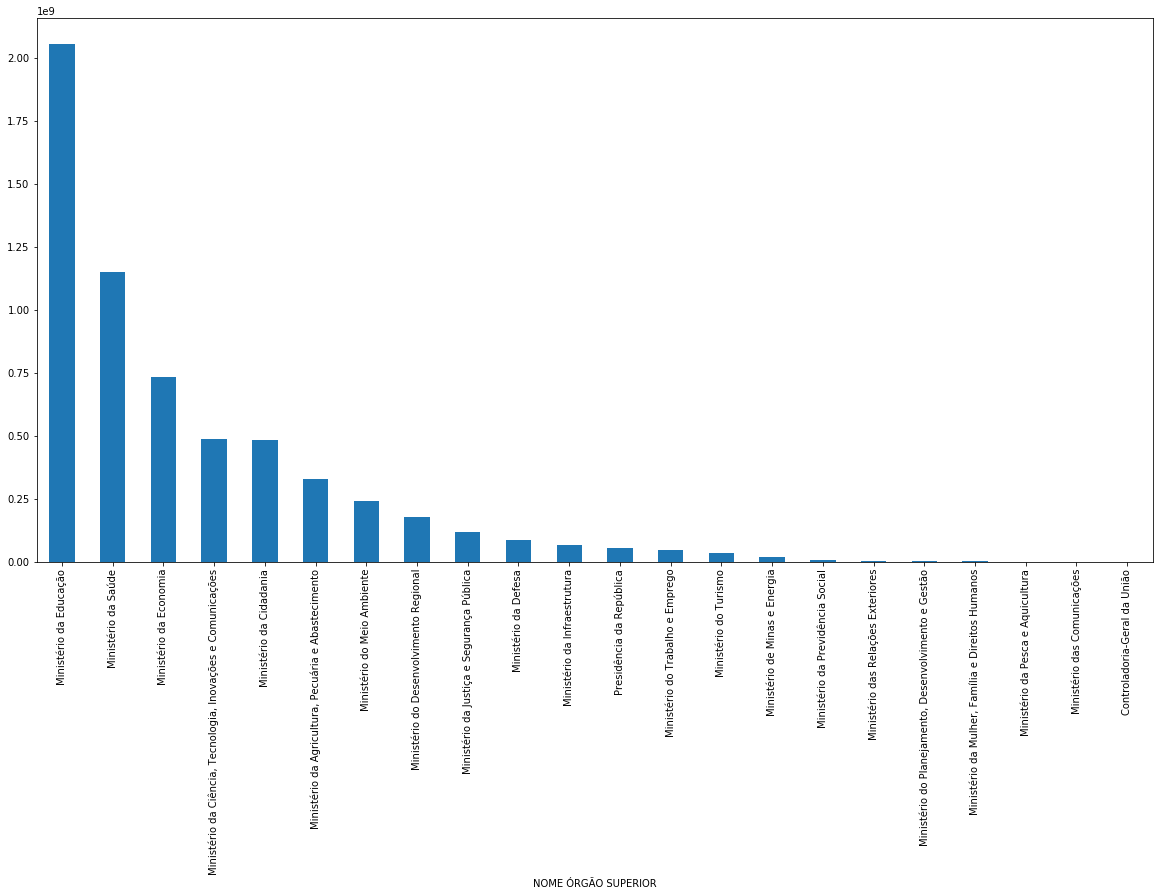

In [53]:
# Gráfico removendo os outliers com método de Tukey
conveniosLimposTukey.groupby(['NOME ÓRGÃO SUPERIOR'])['VALOR CONVÊNIO'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))

**Análise dos gráficos:** para o recorte de dados analisados, verificou-se que os valores distribuídos para os convênios são liberados majoritariamente por  certos órgãos concedentes. Ao analisar os dados eliminando outliers, os atores que figuram como maiores provedores de recursos permanecem na lista dos primeiros mas tem a posição na escala alterada.

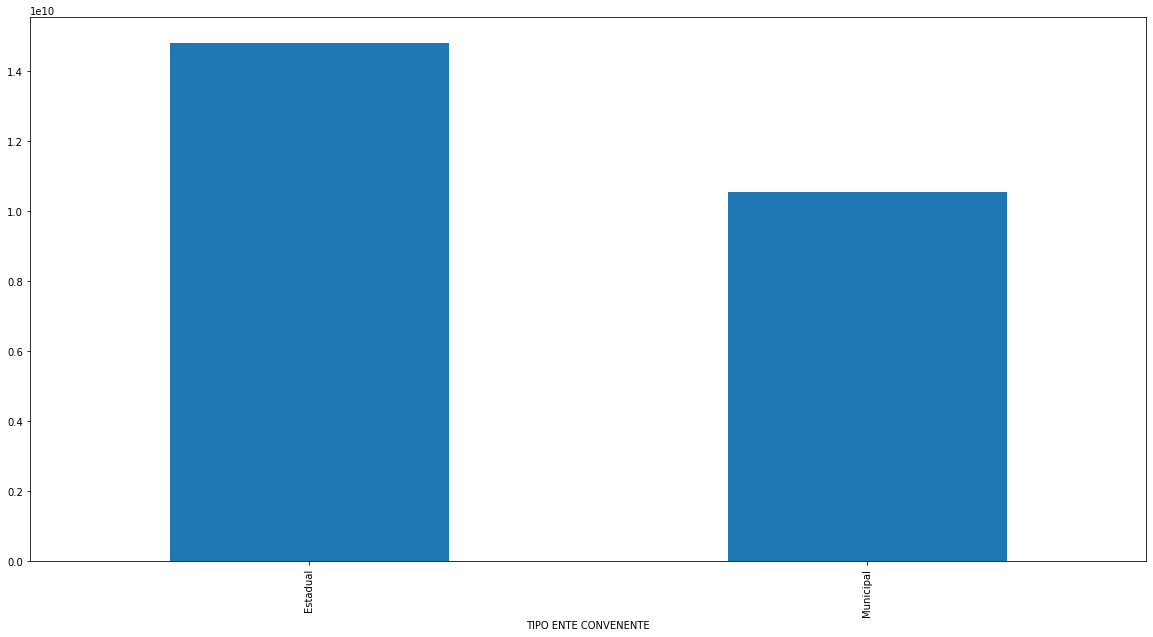

In [58]:
# Analisando a quantidade de recursos por tipo de Ente Convenente
convenios.groupby(['TIPO ENTE CONVENENTE'])['VALOR CONVÊNIO'].sum().sort_values(ascending=False).plot.bar(figsize=(20,10))


In [59]:
convenios.groupby(['UF'])['VALOR CONVÊNIO','VALOR LIBERADO'].agg(['sum', 'mean','median'])

VALOR CONVÊNIO                ... VALOR LIBERADO            
              sum          mean  ...           mean      median
UF                               ...                           
-1  0.000000e+00  NaN            ... NaN            NaN        
AC  7.369505e+08   2.567772e+06  ...  3.282499e+05   52974.860 
AL  3.789969e+08   4.877696e+05  ...  4.308469e+05   52553.770 
AM  2.906442e+08   4.934537e+05  ...  4.588667e+05   69400.000 
AP  1.860720e+08   9.397574e+05  ...  8.803901e+05   50000.000 
BA  9.439128e+08   4.825730e+05  ...  2.952365e+05   50000.000 
CE  1.556142e+09   1.031240e+06  ...  6.722823e+05   59200.000 
DF  7.891138e+09   4.759432e+06  ...  3.960288e+06   24725.000 
ES  2.213960e+08   3.334277e+05  ...  2.441144e+05   27000.000 
EX  0.000000e+00  NaN            ... NaN            NaN        
GO  6.721657e+08   5.230862e+05  ...  4.580982e+05   34528.000 
MA  4.770814e+08   3.681184e+05  ...  2.932612e+05   63403.585 
MG  9.358319e+08   2.161275e+05  ...  1.710582e+05   14459.500 
MS  3.520660e+08   5.771574e+05  ...  3.447513e+05   32490.600 
MT  5.057471e+08   4.862953e+05  ...  3.154490e+05   50000.000 
PA  5.259902e+08   4.446240e+05  ...  3.866877e+05   89109.000 
PB  2.843530e+08   2.231970e+05  ...  1.629527e+05   33976.580 
PE  1.182448e+09   6.780093e+05  ...  5.549964e+05   53397.780 
PI  2.638974e+08   2.055276e+05  ...  1.531372e+05   43933.390 
PR  4.912653e+08   1.806122e+05  ...  1.430449e+05   15130.000 
RJ  2.736491e+09   8.782063e+05  ...  5.505253e+05   14150.000 
RN  3.197057e+08   2.768015e+05  ...  2.181793e+05   31768.600 
RO  2.688228e+08   5.387230e+05  ...  4.389968e+05   50770.000 
RR  2.965424e+08   1.341821e+06  ...  1.196961e+06   109000.000
RS  1.200782e+09   4.073208e+05  ...  3.455362e+05   11431.200 
SC  3.931369e+08   2.058308e+05  ...  1.803150e+05   12500.000 
SE  1.744874e+08   3.279839e+05  ...  2.399412e+05   43236.500 
SP  1.799977e+09   4.290768e+05  ...  3.677058e+05   15000.000 
TO  2.806047e+08   4.343726e+05  ...  3.909394e+05   24137.500 

[29 rows x 6 columns]